<a href="https://colab.research.google.com/github/codeofelango/computervision/blob/main/compuetr_vision_TranferLearningPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PoC - Proof of Concept

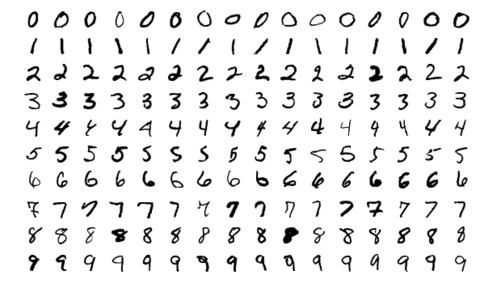

#MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [9]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0].shape

(28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train_full[0]

5

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

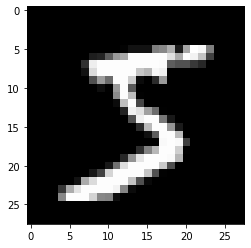

In [13]:
plt.imshow(img, cmap="gray")

In [14]:
label = y_train_full[0]
label

5

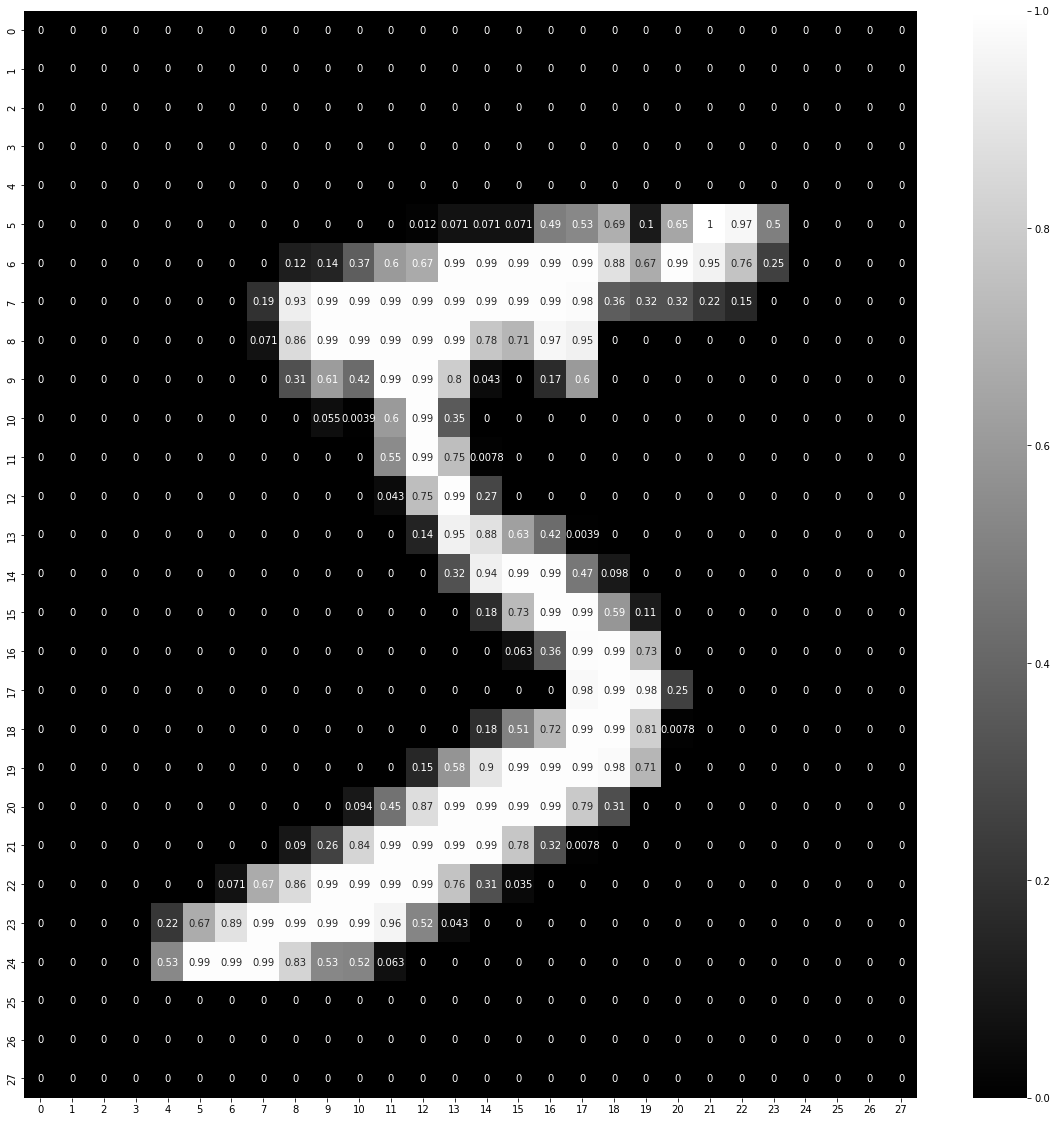

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [16]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [17]:
1.5e+2

150.0

In [18]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [19]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
len(np.unique(y_train))

10

In [22]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [23]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [24]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# weights + biases
784*300 + 300

235500

In [27]:
300*100 + 100

30100

In [28]:
100 * 10 + 10

1010

In [29]:
235500 + 30100 + 1010

266610

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [31]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5952 - accuracy: 0.8459 - val_loss: 0.3167 - val_accuracy: 0.9114
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2902 - accuracy: 0.9175 - val_loss: 0.2426 - val_accuracy: 0.9358
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2381 - accuracy: 0.9319 - val_loss: 0.2064 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2029 - accuracy: 0.9423 - val_loss: 0.1783 - val_accuracy: 0.9486
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1760 - accuracy: 0.9500 - val_loss: 0.1593 - val_accuracy: 0.9546
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1554 - accuracy: 0.9563 - val_loss: 0.1512 - val_accuracy: 0.9568
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1387 - accuracy: 0.9613 - val_loss: 0.1300 - val_accuracy:

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.595201,0.845855,0.316673,0.9114
1,0.290210,0.917545,0.242617,0.9358
2,0.238078,0.931909,0.206441,0.9426
3,0.202891,0.942255,0.178337,0.9486
4,0.175997,0.950036,0.159344,0.9546
5,0.155443,0.956327,0.151191,0.9568
6,0.138697,0.961291,0.129972,0.9646
7,0.125197,0.964691,0.122404,0.9666
8,0.113216,0.968073,0.113321,0.9710
9,0.104139,0.970891,0.107548,0.9724


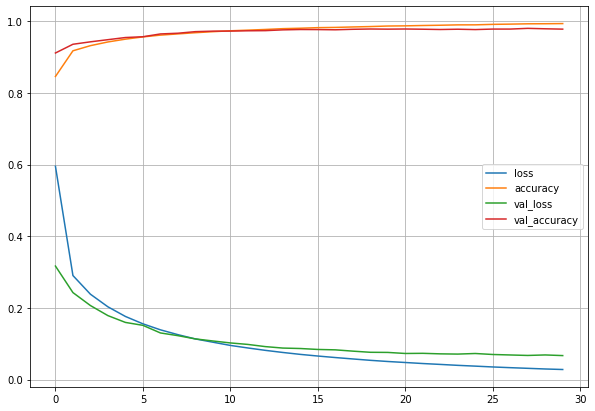

In [33]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [34]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9785


[0.07224933803081512, 0.9785000085830688]

In [35]:
10000/32

312.5

In [36]:
model_clf.save("mnist_full.h5")

In [37]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [38]:
X_new.shape

(3, 28, 28)

In [39]:
y_prob.shape

(3, 10)

In [42]:
y_prob

array([[2.12661703e-07, 3.62378131e-07, 1.68157385e-05, 2.85438378e-04,
        1.18038046e-09, 3.43744517e-07, 1.10540418e-12, 9.99677062e-01,
        1.28847591e-06, 1.84438704e-05],
       [8.31738305e-08, 6.90611387e-06, 9.99985576e-01, 7.11745906e-06,
        4.04555472e-14, 5.57722268e-09, 4.46802702e-08, 1.19572408e-11,
        2.31983194e-07, 2.32750993e-13],
       [6.25577115e-07, 9.98988092e-01, 1.31378620e-04, 2.19108952e-05,
        1.17173746e-04, 1.51465483e-05, 2.64003356e-05, 4.05341299e-04,
        2.86493538e-04, 7.47995136e-06]], dtype=float32)

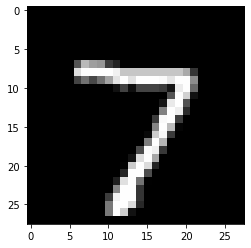

In [40]:
plt.imshow(X_new[0], cmap="gray")

In [44]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

In [45]:
for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [46]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

In [48]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

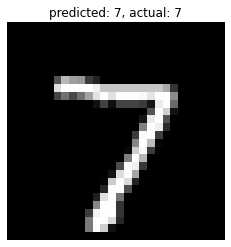

------------------------------------------------------------


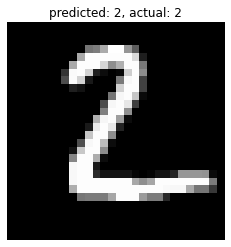

------------------------------------------------------------


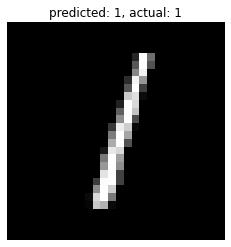

------------------------------------------------------------


In [47]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [49]:
y_train.shape

(55000,)

In [50]:
y_train[1]

3


y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning

## New problem statement - 
Classify handwritten digits into odd and even

In [51]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [52]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [54]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [55]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [56]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [57]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [58]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [59]:
100*2 + 2

202

In [60]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [66]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [67]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))


1 0
2 1
3 0
4 1
5 0


In [68]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [69]:
np.unique(y_train_bin)

array([0, 1])

In [70]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [71]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1936 - accuracy: 0.9271 - val_loss: 0.1349 - val_accuracy: 0.9544
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1299 - accuracy: 0.9540 - val_loss: 0.1200 - val_accuracy: 0.9602
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9577 - val_loss: 0.1132 - val_accuracy: 0.9610
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9604 - val_loss: 0.1080 - val_accuracy: 0.9642
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1097 - accuracy: 0.9614 - val_loss: 0.1051 - val_accuracy: 0.9642
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9627 - val_loss: 0.1084 - val_accuracy: 0.9644
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1050 - accuracy: 0.9635 - val_loss: 0.1029 - val_accuracy:

In [72]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9632


[0.11091500520706177, 0.9631999731063843]

In [76]:
X_test[:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [73]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[1.   , 0.   ],
       [0.   , 1.   ],
       [0.978, 0.022]], dtype=float32)

In [77]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [78]:
y_test_bin[:3]

array([0, 1, 0])

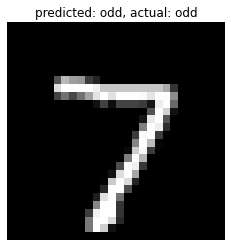

------------------------------------------------------------


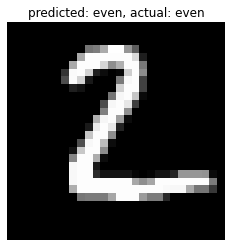

------------------------------------------------------------


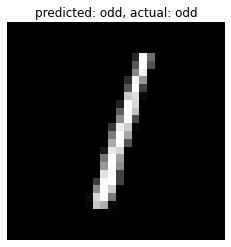

------------------------------------------------------------


In [79]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [80]:
X_train[0].shape

(28, 28)

In [81]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [82]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [83]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [84]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [85]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [86]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [87]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [88]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [89]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [90]:
X_train_CNN[0].shape

(28, 28, 1)

In [91]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [92]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [93]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [94]:
64*5*5

1600

In [95]:
(3*3*1 + 1) * 32

320

In [96]:
(28 - 3) // 1 + 1

26

In [97]:
(26 - 2) // 2 + 1

13

In [98]:
(3*3*32 + 1) * 64

18496

In [99]:
1600 * 10 + 10

16010

# Assignment = 

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

Mail your assignment at - 
sunny@ineuron.ai

Subject Line of this email -

**[FSDS-Nov] CNN transfer learning Assignment**

In [100]:
CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [101]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30, 
    validation_data = (X_valid_CNN, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 15s 4ms/step - loss: 0.6163 - accuracy: 0.8295 - val_loss: 0.2033 - val_accuracy: 0.9412
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1730 - accuracy: 0.9493 - val_loss: 0.1316 - val_accuracy: 0.9634
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1234 - accuracy: 0.9632 - val_loss: 0.1083 - val_accuracy: 0.9692
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1010 - accuracy: 0.9694 - val_loss: 0.0987 - val_accuracy: 0.9708
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.0835 - val_accuracy: 0.9760
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0888 - val_accuracy: 0.9744
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9781 - val_loss: 0.0735 - val_accuracy

In [102]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0434 - accuracy: 0.9872


[0.04338953644037247, 0.9872000217437744]

In [103]:
CNN_model.save("CNN_model_full.h5")

In [104]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [105]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [106]:
lower_pretrained_CNN_model = pre_trained_CNN_model.layers[:-1]

In [110]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [111]:
new_CNN_model.summary()

ValueError: ignored

In [112]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [113]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30, 
    validation_data = (X_valid_CNN, y_valid_bin)
)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1788 - accuracy: 0.9464 - val_loss: 0.1902 - val_accuracy: 0.9308
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0869 - accuracy: 0.9691 - val_loss: 0.0657 - val_accuracy: 0.9770
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0786 - accuracy: 0.9731 - val_loss: 0.0829 - val_accuracy: 0.9700
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0709 - accuracy: 0.9759 - val_loss: 0.0694 - val_accuracy: 0.9764
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0675 - accuracy: 0.9765 - val_loss: 0.0548 - val_accuracy: 0.9832
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9772 - val_loss: 0.0556 - val_accuracy: 0.9822
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9783 - val_loss: 0.0537 - val_accuracy:

In [114]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9857


[0.045109253376722336, 0.9857000112533569]